In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

3 index: 52085


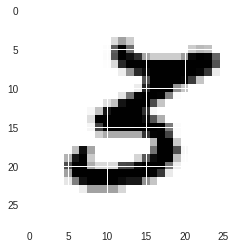

In [29]:
image_index= 52_085
print(y_train[image_index], 'index:', image_index)
plt.imshow(x_train[image_index], cmap='Greys');

In [11]:
n_images_train= x_train.shape[0]
n_images_test=x_test.shape[0]

x_train = x_train.reshape(n_images_train, 28, 28, 1)
x_test = x_test.reshape(n_images_test, 28, 28, 1)
input_shape=[28,28,1]

x_train = x_train.astype('float32')   #we need decimals after dividing
x_test = x_test.astype('float32')    #we need decimals after dividing

x_train /= 255 #dividing by max RGB value for train and test
x_test /= 255

print('x_train shape:', x_train.shape)
print(n_images_train, 'images in x_train') #prints number of images in test
print(n_images_test, 'images in x_test') #prints number of images in test

x_train shape: (60000, 28, 28, 1)
60000 images in x_train
10000 images in x_test


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()    #create model and we will add 8 layers

model.add(Conv2D(32, kernel_size=(5,5),    #convolution for edge detection
                input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))   #pooling reduce pixel volume by half

model.add(Conv2D(64, kernel_size=(5,5),    #convolution
                input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))   #pooling reduce pixel volume by half

model.add(Flatten())   #flatten to create pixel highway

model.add(Dense(1024,      #Dense
               activation=tf.nn.relu))

model.add(Dropout(0.2))    #drop 20% of connections

model.add(Dense(10,
               activation=tf.nn.softmax))      #dense

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(x=x_train,y=y_train, epochs=5); #fit model with 5 epochs, meanig 5 forward and 5 backward passes

Epoch 1/5
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2686 - acc: 0.9122
Epoch 2/5
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0691 - acc: 0.9788
Epoch 3/5
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0503 - acc: 0.9846
Epoch 4/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0391 - acc: 0.9877
Epoch 5/5
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0307 - acc: 0.9900


In [21]:
test_error=model.evaluate(x_test, y_test, verbose=0)
print(f"Mean squared error (MSE) for test data: {test_error}") #prin mse and test erro rate

Mean squared error (MSE) for test data: [0.03582345545403659, 0.9885]


In [0]:
model.save('trained_model.h5') #saving model

Predicted value 9 [[1.3715300e-13 4.4156163e-12 1.4739278e-10 2.0876574e-07 4.2856995e-05
  3.2865737e-09 1.7276034e-13 4.9705358e-07 2.0587881e-06 9.9995446e-01]]


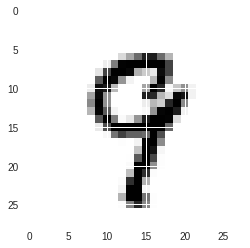

In [26]:
import keras.models 
model_loaded=keras.models.load_model("trained_model.h5")

image_index=3666 

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_loaded.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted value", pred.argmax(),pred)